# Names and IDs
1.  Daniel Korkevados 315347757
2.   Ilay Damary



---
# Section 1
---

# I. Naive Bayes (20 pts)

In this part we will test digits classification on the MNIST dataset, using Bernoulli Naive Bayes (a generative model), in contrast to the Multivariate Logistic Regression (a discriminative model) we saw.

The MNIST dataset contains 28x28 grayscale images of handwritten digits between 0 and 9 (10 classes). For mathmatical analysis clarity, and for matching expected API, each image faltten to create a 1D array with 784 elements.

### Loading the MNIST dataset
Load the MNIST data set. The digits dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. Use

```
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
```

To fetch the original data. Each image is a 28 by 28 pixels in grayscale range [0,255] and the corresponding label is an integer $y\in [0,9]$. Each image should be transformed into a 1D integer array $x\in [0,255]^{784}$.

```
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)
```

Divide your data into train and test sets in a 80-20 ration split. And plot a single sample of each digit as the original image, so you get a feeling how the data looks like.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns


In [ ]:
# Implement here
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


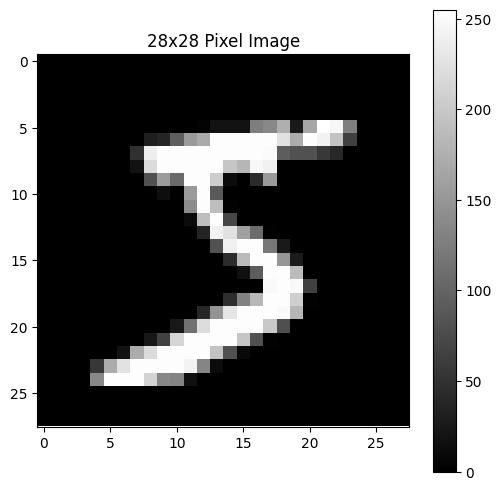

In [ ]:
x_train[0]
plt.figure(figsize=(6, 6))
plt.imshow(x_train[0] , cmap='gray', vmin=0, vmax=255)
plt.colorbar()
plt.title('28x28 Pixel Image')
plt.show()


In [ ]:
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)


### Bernoulli Naive Bayes
If we know how the digits are generated, then we know how to classify them (simply choose the digit class which will maximize the posterior probability) --- but which model should we use for describing the digits generation?

In this part we will try a very simplified model of digits creation (which is obviously not the same as the "real" model), using a Naive Bayes over an underlying Bernoulli distribution --- that is, we will assume that given a digit class, the pixels of the images are the result of independent coin flips, each with its own "head" probability.

Note that since we assume each pixl is either 0 (black) or 1 (white), we will need to adjust (preprocess) our data accrodingly (see below).

So, the model is stated as follows:
$$
\begin{align}
\text{Domain} && x \in \{0,1\}^{784} \\
\text{Prior} && \pi_j = \Pr(y=j) \\
\text{Likelihood} && P_j(x) = \Pr(x | y=j) \\
\end{align}
$$

Where for each $i\in 0\ldots 784$ it holds that the probability of a pixel $i$ to be on given that the digit is $j$ is:
$$
P_{ji}(x_i) = \Pr(x_i | y=j) =
\begin{cases}
p_{ji} & \text{if } x_i=1 \\
1-p_{ji} & \text{if } x_i=0 \\
\end{cases}
$$


#### Question 1
Research the differences between the three types of Naive Bayes classifiers: Bernoulli NB, Multinomial NB, and Gaussian NB.
Describe in your own words what makes each type unique and specify the kind of tasks for which you would prefer each one.

#### Answer 1



1.   **Bernoulli Naive Bayes:** Bernoulli Naive Bayes operates on binary features,  estimating the probability of each feature being present or absent given a class. The model calculates the likelihood of outcomes based on the presence or absence of these binary attributes. It uses binary probability estimates (like flipping a coin where each feature has two possible outcomes, present or not) to predict the class of a new sample.

2.   **Multinomial Naive Bayes:** The logic behind Multinomial Naive Bayes revolves around estimating the probability of counts of features appearing in samples. It works by calculating the probability of observing counts among several categories (like how many times different words appear in a document) using probability distributions derived from frequency counts across classes. This classifier essentially estimates the likelihood of event frequencies or counts, which are then used to make predictions.

3.   **Gaussian Naive Bayes:** Gaussian Naive Bayes assumes that the continuous features of each class are normally distributed. It calculates the mean and variance of each feature within each class to estimate the parameters of the Gaussian distribution. When making predictions, it evaluates the probability density of the given features under the estimated Gaussian distributions for each class. This method allows the classifier to assess where a new sample's features fit within these distributions, predicting the most likely class based on these assessments.

#### Question 2
Train a Naive Bayes classifier using the training data and apply predictions on the test data. Use the [sklearn.naive_bayes.BernoulliNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html) implementation (see the [source code for sklearn.naive_bayes](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/naive_bayes.py) for details).

Remember we need to preprocess the data in this case such that each pixel would become either black (0) or white (1). For this purpose, use the `binarize` parameter of the `BernoulliNB` function. Set this value to $0$ (this is the default), which in this case would mean every pixel with non-zero value will be set to 1.

1. Plot the confusion matrix of your classifier, as claculated on the test data (it is recommended to use [sklearn.metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)). Calculate the total accuracy (fraction of correctly classified images), and summarize the results in your own words.

    A **confusion matrix** for a multi-class classifier is a table that summarizes the performance of the model by comparing the predicted class labels to the true class labels: Each row represents the actual class, and each column represents the predicted class. The diagonal elements indicate the number of correct predictions for each class. Off-diagonal elements show misclassifications (e.g., how many times one class was predicted as another).


2. Plot the mean image of each class (estimated $\hat{p}_{ji}$) and generate one sample of each class (remember, you can do this since this is a generative model). You will need to access the `feature_log_prob_` attribute of the trained model.

3. Think of a way you can find the optimal threshold of the binarization part. **There is no need to actually perform this task --- just describe what you would have done.**

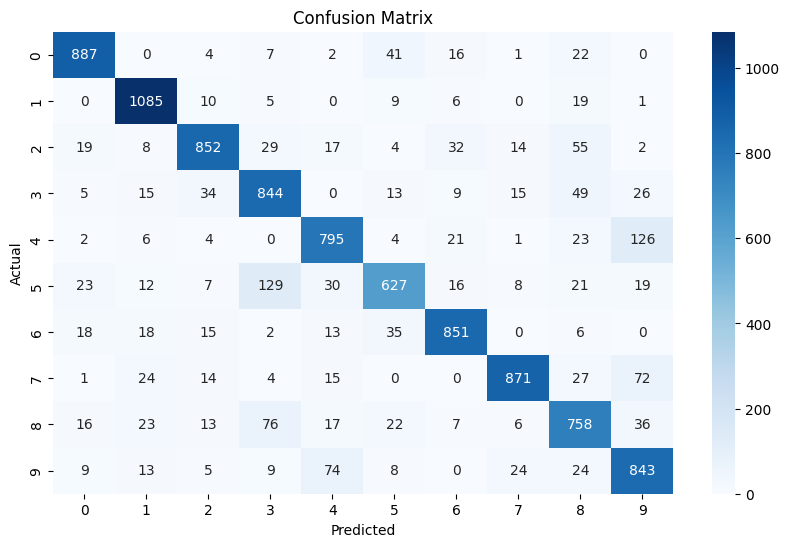

In [ ]:
# code goes here

Bernoulimodel = BernoulliNB(binarize=0)
Bernoulimodel.fit(x_train, y_train)
ber_pred = Bernoulimodel.predict(x_test)
confusion_matrix(y_test, ber_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, ber_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#### Answer 2
From the confusion matrix, it's evident that some classes have higher misclassification rates than others. For instance, class 5 shows significant confusion with class 3, with 129 instances incorrectly classified as class 3. Similarly, class 4 has a relatively high number of false positives, with 126 instances misclassified as class 9. These insights suggest that the model struggles with distinguishing between certain classes, which could be due to similarities in the features or insufficient training data for these classes.



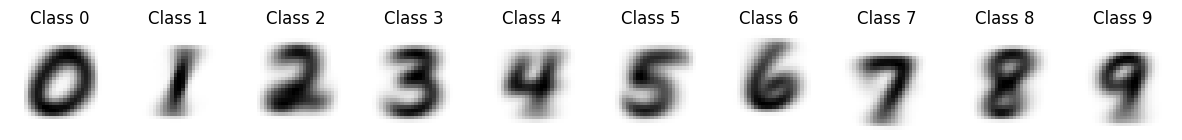

In [ ]:
probabilities = np.exp(Bernoulimodel.feature_log_prob_)

# Plot mean images
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(15, 2))
for i, ax in enumerate(axes):
    ax.imshow(probabilities[i].reshape(28, 28), cmap='gray_r')  # using gray_r to better visualize white on black
    ax.title.set_text(f'Class {i}')
    ax.axis('off')
plt.show()


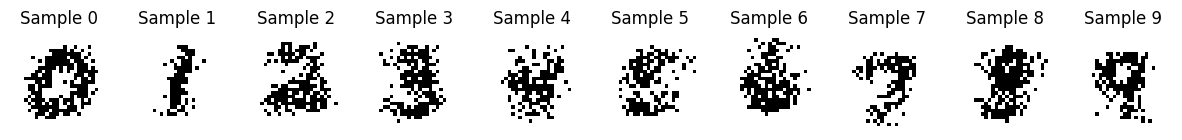

In [ ]:
# Generate one sample per class
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(15, 2))
for i, ax in enumerate(axes):
    random_sample = np.random.binomial(1, probabilities[i], (784,))  # generate a Bernoulli sample for each pixel
    ax.imshow(random_sample.reshape(28, 28), cmap='gray_r')
    ax.title.set_text(f'Sample {i}')
    ax.axis('off')
plt.show()

3. To identify the optimal binarization threshold for Bernoulli Naive Bayes, we can test a range of threshold values using cross-validation and measure model performance with metrics like accuracy or F1 score. Select the threshold that yields the highest performance. This approach may get the threshold optimally enhances the model’s predictive accuracy.










# II. Perceptron Algorithm (20 points)
1.	Provide an example of four samples in $R^2$ of a non-linearly separable dataset and describe the behavior of the perceptron algorithm when applied to it.

In [ ]:
df = pd.DataFrame([[-1, -1,"red"], [1, 1,"blue"], [0, 1,"red"], [1, 0,"blue"]])
df.columns = [['x_axis','y_axis','color']]
df.head()

,x_axis,y_axis,color
0,-1,-1,red
1,1,1,blue
2,0,1,red
3,1,0,blue


2. Prove no-convergence for this case.

I will use of Code , i build a perceptron class recieve learning rate, and number of iterations for this case we will do 5 eaxamples in which will be detailed and 10,50,1000 just to show it isnt covergince

In [ ]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.1, max_iterations=5):
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.weights = None

    def fit(self, X, y, detailed=False):
        n_samples, n_features = X.shape
        # Initialize weights, including one for the bias term
        self.weights = np.zeros(n_features + 1)

        # Add bias term to input features
        X = np.c_[X, np.ones(n_samples)]

        for i in range(self.max_iterations):
            if detailed or self.max_iterations < 10:  # Only print details for 5 iterations
                print(f"Iteration {i+1}")
            has_errors = False
            for idx, x in enumerate(X):
                # Calculate the linear output
                linear_output = np.dot(x, self.weights)
                y_predicted = np.where(linear_output > 0, 1, -1)

                # Check if an update is needed
                if y_predicted != y[idx]:
                    has_errors = True
                    # Update the weights according to the perceptron learning rule
                    self.weights += self.learning_rate * y[idx] * x

            if detailed or self.max_iterations < 10:  # Print results for detailed mode
                self.print_results(X, y)
                print("Weights after iteration:", self.weights)
            if not has_errors:
                if detailed or self.max_iterations < 10:
                    print("Convergence achieved.")
                return
            if detailed or self.max_iterations < 10:
                print("\n")
        print("Reached maximum iterations without convergence.")

    def predict(self, X):
        # Make sure the input X includes the bias term
        X_with_bias = np.c_[X, np.ones(X.shape[0])]
        linear_output = np.dot(X_with_bias, self.weights)
        return np.where(linear_output > 0, 1, -1)

    def print_results(self, X, y):
        predictions = self.predict(X[:,:-1])  # remove bias term for prediction
        predicted_labels = ["blue" if pred == 1 else "red" for pred in predictions]
        print("Predictions:", predicted_labels)
        actual_labels = ["blue" if label == 1 else "red" for label in y]
        print("Actual labels:", actual_labels)

# Define XOR dataset with "red" and "blue" labels
X = np.array([[-1, -1], [1, 1], [0, 1], [1, 0]])
labels = np.array(["red", "red", "blue", "blue"])

# Map string labels to numeric values: "red" to -1, "blue" to 1
label_map = {"red": -1, "blue": 1}
y = np.array([label_map[label] for label in labels])

# Create a Perceptron instance for each test scenario
print("Test with 5 samples (detailed output):")
p5 = Perceptron(learning_rate=0.4, max_iterations=5)
p5.fit(X, y, detailed=True)

print("\nTest with 10 samples:")
p10 = Perceptron(learning_rate=0.4, max_iterations=10)
p10.fit(X, y)

print("\nTest with 100 samples:")
p100 = Perceptron(learning_rate=0.4, max_iterations=100)
p100.fit(X, y)

print("\nTest with 1000 samples:")
p1000 = Perceptron(learning_rate=0.4, max_iterations=1000)
p1000.fit(X, y)


Test with 5 samples (detailed output):
Iteration 1
Predictions: ['red', 'blue', 'blue', 'blue']
Actual labels: ['red', 'red', 'blue', 'blue']
Weights after iteration: [0.  0.4 0.4]


Iteration 2
Predictions: ['blue', 'blue', 'blue', 'blue']
Actual labels: ['red', 'red', 'blue', 'blue']
Weights after iteration: [0.  0.4 0.8]


Iteration 3
Predictions: ['red', 'blue', 'blue', 'blue']
Actual labels: ['red', 'red', 'blue', 'blue']
Weights after iteration: [0.4 0.4 0.4]


Iteration 4
Predictions: ['red', 'blue', 'blue', 'blue']
Actual labels: ['red', 'red', 'blue', 'blue']
Weights after iteration: [0.  0.4 0.4]


Iteration 5
Predictions: ['blue', 'blue', 'blue', 'blue']
Actual labels: ['red', 'red', 'blue', 'blue']
Weights after iteration: [0.  0.4 0.8]


Reached maximum iterations without convergence.

Test with 10 samples:
Reached maximum iterations without convergence.

Test with 100 samples:
Reached maximum iterations without convergence.

Test with 1000 samples:
Reached maximum iterati


3. Discuss how the perceptron algorithm could be modified to handle datasets that are not linearly separable.

To enhance the perceptron algorithm's capability to handle non-linearly separable datasets, several modifications can be implemented.transform data into a higher-dimensional spae, utilizing ensemble methods to create more robust models, and transitioning to multilayer perceptrons or neural networks to capture complex, non-linear relationships. Additionally, incorporating advanced optimization techniques and feature engineering can significantly improve the algorithm's effectiveness and adaptability to diverse data scenarios.




---
# Section 2 - Kaggle competition
---

# miRNA animals interaction prediction (60 pts)
In this section, you will explain the tools and methods you used in the competition. Fifty points will be given according to the explanations of the section and up to ten points according to your relative position in the competition. Participate in the following contest and answer the following questions:
https://www.kaggle.com/t/219246964ae74bb48a729eee89895617

In this section you are allow to use only Decision Tree as your ML model.



### EDA - Exploratory Data Analysis (10 pts):
Use any visual tools to present and explain the data. Your answer must include statistics, images, and conclusions.

***Write your code below***


In [ ]:
# Implement here
x_train = pd.read_csv('x_train.csv')
y_train = pd.read_csv('y_train.csv')

In [ ]:
y_train = y_train.iloc[:, 1]  # Take the Second column
# Combine features and labels into a single DataFrame
data = pd.concat([x_train, y_train], axis=1)
data.columns = list(x_train.columns) + ['label']  # Optional: rename label column
data = data.drop(['id'],axis=1) #drop the id that is irrealvant

#### Number of Columns And Rows

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9055 entries, 0 to 9054
Columns: 593 entries, Acc_P10_10th to label
dtypes: float64(569), object(24)
memory usage: 41.0+ MB


#### Labels Distribution

In [ ]:
true_labels = {1.0:"fly",2.0:"cow",3.0:"human",4.0:"mouse",5.0:"worm"}
label_count = data['label'].value_counts(dropna=False)
label_count.index = label_count.index.map(true_labels)
label_count

,count
label,
cow,3361
NaN,2692
mouse,1319
fly,1210
human,266
worm,207


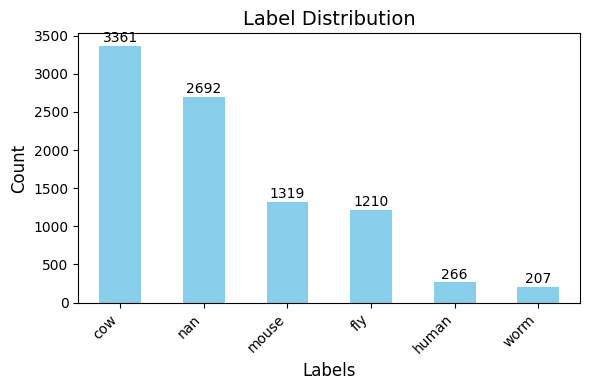

In [ ]:
plt.figure(figsize=(6,4))
label_count.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Labels', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Label Distribution', fontsize=14)
for index, value in enumerate(label_count):
    plt.text(index, value + 50, str(value), ha='center', fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### **Columns Types**

In [ ]:
object_columns = data.select_dtypes(include=['object']).columns
float_columns = data.select_dtypes(include=['float64']).columns
print(f"category_columns : {len(object_columns)}")
print(f"float_columns : {len(float_columns)}")

category_columns : 24
float_columns : 569


lets see which values we have in the categorical columns

In [ ]:
list_numeric_column = list(float_columns)
list_object_columns = list(object_columns)
len(list_object_columns)
categories = data[list_object_columns].describe().T
for index,col in enumerate(list_object_columns):
  unique_values = data[col].dropna().unique()
  categories.iloc[index]['unique'] = list(unique_values)
categories

<ipython-input-148-da4b93b2a3c4>:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  categories.iloc[index]['unique'] = list(unique_values)


,count,unique,top,freq
Seed_match_canonical,6329,"[False, True]",False,4762
Seed_match_noncanonical,6273,"[True, False]",False,4298
miRNAMatchPosition_1,6320,"[AU, MM, GC, GU, BB]",MM,4399
miRNAMatchPosition_10,6275,"[MM, GC, AU, BB, GU]",MM,2296
miRNAMatchPosition_11,6338,"[MM, BB, GC, AU, GU]",GC,2461
miRNAMatchPosition_12,6351,"[BB, MM, AU, GU, GC]",GC,1969
miRNAMatchPosition_13,6422,"[AU, BB, MM, GU, GC]",AU,1963
miRNAMatchPosition_14,6283,"[BB, GC, AU, MM, GU]",AU,1912
miRNAMatchPosition_15,6247,"[GC, BB, MM, AU, GU]",GC,2631
miRNAMatchPosition_16,6315,"[MM, BB, AU, GC, GU]",AU,2281


In [ ]:
list_numeric_column = list(float_columns)
list_object_columns = list(object_columns)
binary_columns = [col for col in data.columns if data[col].nunique() == 2]
binary_cloumns_from_float = [col for col in binary_columns if col in float_columns]
list_object_columns = list_object_columns + binary_cloumns_from_float
list_numeric_column = list(set(list_numeric_column) - set(list_object_columns))
assert len(list_numeric_column)+len(list_object_columns) == 593

In [ ]:
print(f"After find more categorial column")
print(f"category_columns : {len(list_object_columns)}")
print(f"float_columns : {len(list_numeric_column)}")

After find more categorial column
category_columns : 99
float_columns : 494


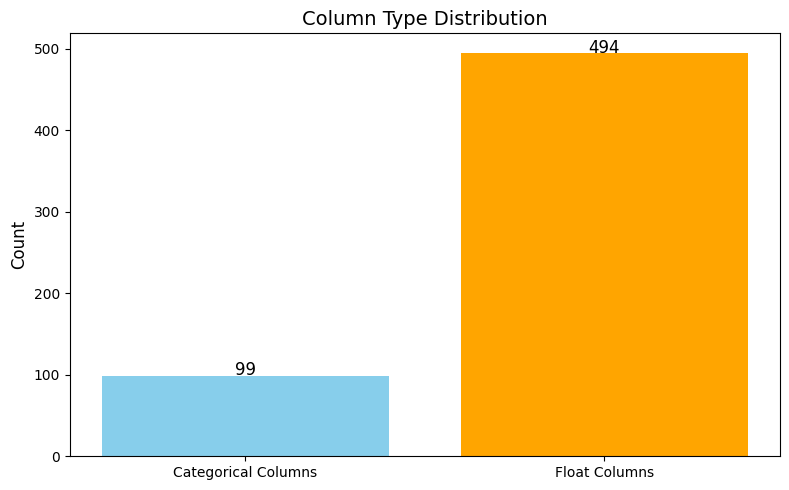

In [ ]:
category_count = len(list_object_columns)
float_count = len(list_numeric_column)

# Create data for plotting
counts = [category_count, float_count]
labels = ['Categorical Columns', 'Float Columns']

# Bar plot
plt.figure(figsize=(8, 5))
plt.bar(labels, counts, color=['skyblue', 'orange'])

# Add title and labels
plt.title('Column Type Distribution', fontsize=14)
plt.ylabel('Count', fontsize=12)

# Annotate bars with values
for i, count in enumerate(counts):
    plt.text(i, count + 0.2, str(count), ha='center', fontsize=12)

plt.tight_layout()
plt.show()


#### **NaN Statistics**

In [ ]:
data.describe()

,Acc_P10_10th,Acc_P10_1th,Acc_P10_2th,Acc_P10_3th,Acc_P10_4th,Acc_P10_5th,Acc_P10_6th,Acc_P10_7th,Acc_P10_8th,Acc_P10_9th,...,miRNAPairingCount_X3p_AU,miRNAPairingCount_X3p_GC,miRNAPairingCount_X3p_GU,miRNAPairingCount_X3p_bulge_mir_nt,miRNAPairingCount_X3p_bulge_nt,miRNAPairingCount_X3p_bulge_target_nt,miRNAPairingCount_X3p_mir_bulge,miRNAPairingCount_X3p_mismatch,miRNAPairingCount_X3p_target_bulge,label
count,6.319000e+03,6319.000000,6344.000000,6320.000000,6344.000000,6390.000000,6.336000e+03,6.309000e+03,6.293000e+03,6.327000e+03,...,6306.000000,6325.000000,6393.000000,6292.000000,6336.000000,6332.000000,6301.000000,6351.000000,6373.000000,6363.000000
mean,1.352541e-01,0.597007,0.481969,0.397697,0.328774,0.273044,2.332613e-01,1.981153e-01,1.760452e-01,1.495752e-01,...,3.736283,4.150040,1.206789,1.147171,3.526357,2.370973,0.529281,4.289403,1.022595,2.363822
std,2.006150e-01,0.297913,0.302151,0.293714,0.277694,0.262293,2.483091e-01,2.347001e-01,2.260636e-01,2.100952e-01,...,1.782746,1.772685,1.153885,1.877242,4.486542,4.466757,0.650012,2.724750,0.900299,1.105326
min,8.070000e-11,0.000291,0.000084,0.000011,0.000009,0.000003,5.920000e-07,5.000000e-09,5.040000e-10,1.690000e-10,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,9.537076e-03,0.340924,0.209290,0.141380,0.093251,0.064512,4.337318e-02,2.920361e-02,2.152900e-02,1.324623e-02,...,3.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,2.000000
50%,4.782703e-02,0.632522,0.451097,0.333179,0.250731,0.177781,1.377855e-01,1.016490e-01,7.900122e-02,5.791601e-02,...,4.000000,4.000000,1.000000,0.000000,2.000000,1.000000,0.000000,4.000000,1.000000,2.000000
75%,1.656702e-01,0.880755,0.752339,0.631329,0.512383,0.415355,3.444897e-01,2.826754e-01,2.403039e-01,1.932667e-01,...,5.000000,5.000000,2.000000,2.000000,4.000000,3.000000,1.000000,6.000000,2.000000,3.000000
max,9.998509e-01,0.999969,0.999724,0.999908,0.999851,0.999812,9.998352e-01,9.998392e-01,9.996446e-01,9.969508e-01,...,10.000000,10.000000,7.000000,15.000000,40.000000,40.000000,3.000000,16.000000,5.000000,5.000000


In [ ]:
total_nulls = data.isnull().sum().sum()
print(f"Total NaN values in DataFrame: {total_nulls}")


Total NaN values in DataFrame: 1610722


In [ ]:
nulls_per_column = data.isnull().sum()
print("NaN values per column:")
print(nulls_per_column.sort_values(ascending=True))


NaN values per column:
Acc_P18_3th                 2578
Acc_P26_8th                 2597
Acc_P15_8th                 2600
Acc_P27_8th                 2600
Acc_P34_1th                 2607
                            ... 
HotPairingMirna_he_P3_L2    2813
Acc_P12_5th                 2823
Acc_P6_2th                  2825
MRNA_Up_CU_comp             2829
Acc_P21_6th                 2841
Length: 593, dtype: int64


In [ ]:
null_percentage = (data.isnull().sum() / len(data)) * 100
print("Percentage of NaN values per column:")
print(null_percentage.sort_values(ascending=True))


Percentage of NaN values per column:
Acc_P18_3th                 28.470458
Acc_P26_8th                 28.680287
Acc_P15_8th                 28.713418
Acc_P27_8th                 28.713418
Acc_P34_1th                 28.790723
                              ...    
HotPairingMirna_he_P3_L2    31.065710
Acc_P12_5th                 31.176146
Acc_P6_2th                  31.198233
MRNA_Up_CU_comp             31.242408
Acc_P21_6th                 31.374931
Length: 593, dtype: float64


In [ ]:
nulls_per_row = data.isnull().sum(axis=1)
print("NaN values per row:")
print(nulls_per_row.sort_values(ascending=True))


NaN values per row:
3217    137
2190    138
4560    140
1318    143
6390    144
       ... 
2153    215
3830    217
221     218
4795    220
3854    221
Length: 9055, dtype: int64


#### **Deeper Analyziz for the columns**

lets group columns with the same prefix

In [ ]:
grouped_columns = {}
for col in data.columns:
    prefix = col.split('_')[0] #Split the Name By _ and group similar columns
    if prefix not in grouped_columns:
        grouped_columns[prefix] = []
    grouped_columns[prefix].append(col)

print(f"total of groups : {len(grouped_columns)}")
for k,v in grouped_columns.items():
    print(f"name of start_column {k} : \n number of columns: {len(v)} first 5 columns: {v[:5]} ...")

total of groups : 9
name of start_column Acc : 
 number of columns: 370 first 5 columns: ['Acc_P10_10th', 'Acc_P10_1th', 'Acc_P10_2th', 'Acc_P10_3th', 'Acc_P10_4th'] ...
name of start_column Energy : 
 number of columns: 7 first 5 columns: ['Energy_MEF_3p', 'Energy_MEF_Duplex', 'Energy_MEF_Seed', 'Energy_MEF_cons_local_target', 'Energy_MEF_cons_local_target_normalized'] ...
name of start_column HotPairingMRNA : 
 number of columns: 45 first 5 columns: ['HotPairingMRNA_he_P1_L1', 'HotPairingMRNA_he_P1_L2', 'HotPairingMRNA_he_P1_L3', 'HotPairingMRNA_he_P1_L4', 'HotPairingMRNA_he_P1_L5'] ...
name of start_column HotPairingMirna : 
 number of columns: 45 first 5 columns: ['HotPairingMirna_he_P1_L1', 'HotPairingMirna_he_P1_L2', 'HotPairingMirna_he_P1_L3', 'HotPairingMirna_he_P1_L4', 'HotPairingMirna_he_P1_L5'] ...
name of start_column MRNA : 
 number of columns: 60 first 5 columns: ['MRNA_Dist_to_end', 'MRNA_Dist_to_start', 'MRNA_Down_AA_comp', 'MRNA_Down_AC_comp', 'MRNA_Down_AG_comp'] ...


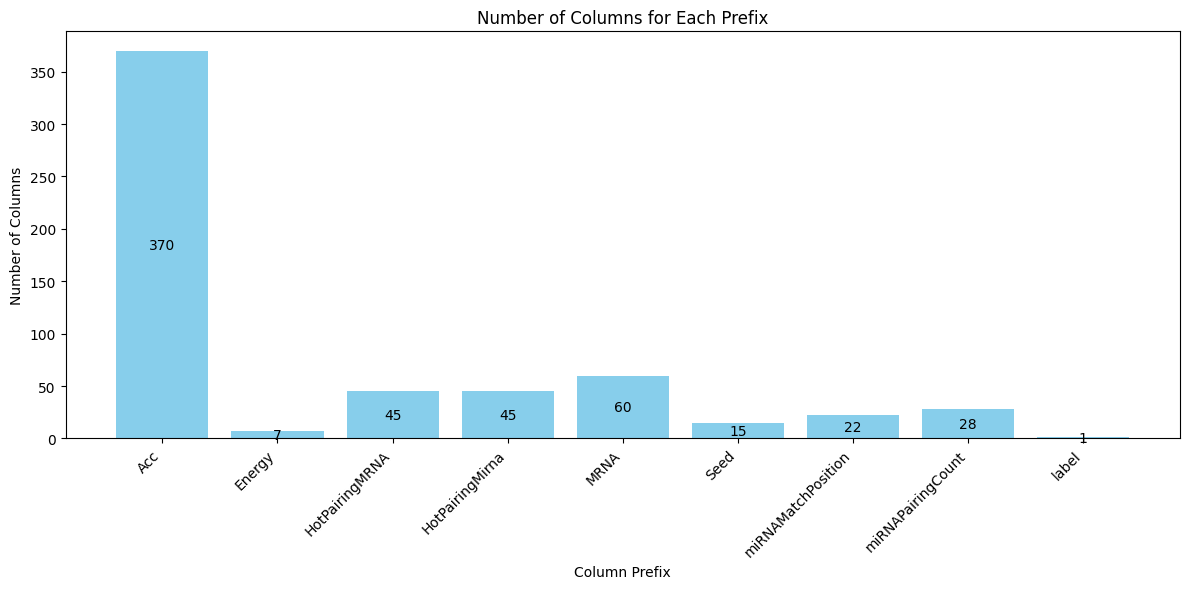

In [ ]:
keys = list(grouped_columns.keys())
values = [len(v) for v in grouped_columns.values()]

# Plot the data
plt.figure(figsize=(12, 6))
bars = plt.bar(keys, values, color='skyblue')

plt.bar(keys, values, color='skyblue')
plt.xlabel('Column Prefix')
plt.ylabel('Number of Columns')
plt.title('Number of Columns for Each Prefix')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height / 2.0, str(height),
             ha='center', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()


1.    It Seemes that Acc is represent 10 samples from something due 37 instance
2.   It Seemes that HotPairingMRNA and HotPairingMirna are related ?



In [ ]:
Acccolumns = {}
for col in grouped_columns['Acc']:
    prefix = col.split('_')[0]+ "_" + col.split('_')[1]  # חילוץ הקידומת לפני _
    if prefix not in Acccolumns:
        Acccolumns[prefix] = []
    Acccolumns[prefix].append(col)

print(f"total of groups : {len(Acccolumns)}")
for k,v in Acccolumns.items():
    print(f"name of start_column {k} : \n number of columns: {len(v)} first 5 columns: {v[:5]} ...")

total of groups : 37
name of start_column Acc_P10 : 
 number of columns: 10 first 5 columns: ['Acc_P10_10th', 'Acc_P10_1th', 'Acc_P10_2th', 'Acc_P10_3th', 'Acc_P10_4th'] ...
name of start_column Acc_P11 : 
 number of columns: 10 first 5 columns: ['Acc_P11_10th', 'Acc_P11_1th', 'Acc_P11_2th', 'Acc_P11_3th', 'Acc_P11_4th'] ...
name of start_column Acc_P12 : 
 number of columns: 10 first 5 columns: ['Acc_P12_10th', 'Acc_P12_1th', 'Acc_P12_2th', 'Acc_P12_3th', 'Acc_P12_4th'] ...
name of start_column Acc_P13 : 
 number of columns: 10 first 5 columns: ['Acc_P13_10th', 'Acc_P13_1th', 'Acc_P13_2th', 'Acc_P13_3th', 'Acc_P13_4th'] ...
name of start_column Acc_P14 : 
 number of columns: 10 first 5 columns: ['Acc_P14_10th', 'Acc_P14_1th', 'Acc_P14_2th', 'Acc_P14_3th', 'Acc_P14_4th'] ...
name of start_column Acc_P15 : 
 number of columns: 10 first 5 columns: ['Acc_P15_10th', 'Acc_P15_1th', 'Acc_P15_2th', 'Acc_P15_3th', 'Acc_P15_4th'] ...
name of start_column Acc_P16 : 
 number of columns: 10 first 

In [ ]:
from IPython.display import display, HTML

# Example: Extract data slices
P1 = Acccolumns['Acc_P1']
data_P1 = data.loc[0][P1]

P2 = Acccolumns['Acc_P2']
data_P2 = data.loc[0][P2]

P3 = Acccolumns['Acc_P3']
data_P3 = data.loc[0][P3]

P4 = Acccolumns['Acc_P4']
data_P4 = data.loc[0][P4]

P12 = Acccolumns['Acc_P12']
data_P12 = data.loc[0][P12]

P19 = Acccolumns['Acc_P19']
data_P19 = data.loc[0][P19]



P1 = Acccolumns['Acc_P1']
data_P1 = data.loc[0][P1]

def move_row_one_down(series):
    """
    Moves the first element of a pandas Series to the end.
    """
    # Extract the first index and value
    first_index = series.index[0]
    first_value = series.iloc[0]

    # Drop the first element and append it to the end
    series = series.iloc[1:]  # Remove the first element
    series[first_index] = first_value  # Append the first element at the end

    return series

# Apply the function to data_P1
data_P1 = move_row_one_down(data_P1)
data_P2 = move_row_one_down(data_P2)
data_P3 = move_row_one_down(data_P3)
data_P4 = move_row_one_down(data_P4)
data_P12 = move_row_one_down(data_P12)
data_P19 = move_row_one_down(data_P19)


# Create HTML tables for each slice
html_table = f"""
<h1>Lets observe on Acc related together</h1>
<table>
<tr>
    <th>P1</th>
    <th>P2</th>
    <th>P3</th>
    <th>P4</th>
    <th>P12</th>
    <th>P19</th>
</tr>
    <tr>
        <td>{data_P1.to_frame().to_html(index=True, header=False)}</td>
        <td>{data_P2.to_frame().to_html(index=True, header=False)}</td>
        <td>{data_P3.to_frame().to_html(index=True, header=False)}</td>
        <td>{data_P4.to_frame().to_html(index=True, header=False)}</td>
        <td>{data_P12.to_frame().to_html(index=True, header=False)}</td>
        <td>{data_P19.to_frame().to_html(index=True, header=False)}</td>
    </tr>
</table>
<h2>Its obvious that for each sample Acc_P* contain 10 different samples that decrease and contain some missing value </h2>

"""

# Display the tables side by side
display(HTML(html_table))


In [ ]:
def makedatafor_index(index):
  acc_dict = {}
  for i in range(1, 38):
      name = str(i)
      rows = 'Acc_P' + name
      max_val = data.loc[index][Acccolumns[rows]].max()  # Max across all columns in the group
      min_val = data.loc[index][Acccolumns[rows]].min()  # Min across all columns in the group
      mean_val = data.loc[index][Acccolumns[rows]].mean()  # Mean across all columns in the group
      acc_dict[rows] = {'min': min_val, 'max': max_val, 'mean': mean_val}
  # Create a DataFrame with rows as 'min', 'max', 'mean' and columns as keys of acc_dict
  newdata = pd.DataFrame(acc_dict)  # Transpose to have keys as columns
  return newdata.T

def plot_graph_for_each_acc_group(df):
  newdata = df
  plt.figure(figsize=(14, 7))
  # Plot each index as a line
  plt.plot(newdata.index, newdata['min'], label='Min', color='blue', marker='o')
  plt.plot(newdata.index, newdata['max'], label='Max', color='orange', marker='s')
  plt.plot(newdata.index, newdata['mean'], label='Mean', color='green', marker='^')
  # Add labels, title, and legend
  plt.xlabel('Groups (Acc_P)', fontsize=12)
  plt.ylabel('Values', fontsize=12)
  plt.title('Min, Max, and Mean Values Across Groups', fontsize=14)
  plt.xticks(rotation=45, ha='right')
  plt.legend()

  # Tight layout for better spacing
  plt.tight_layout()
  plt.show()


Filtered Unique Labels: [4. 2. 3. 1. 5.]


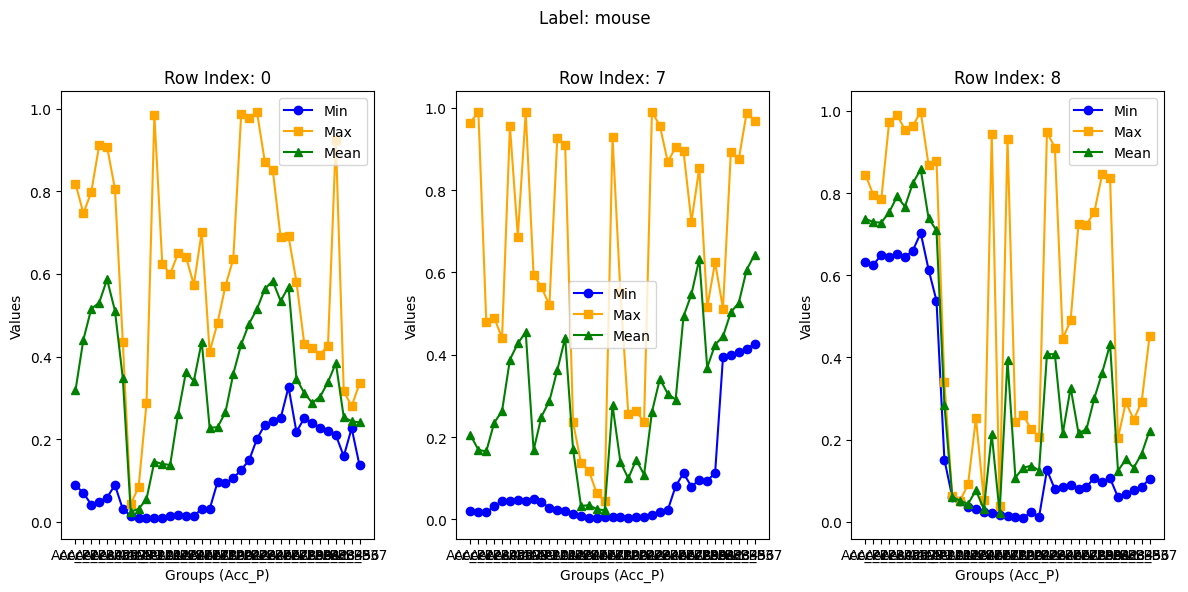

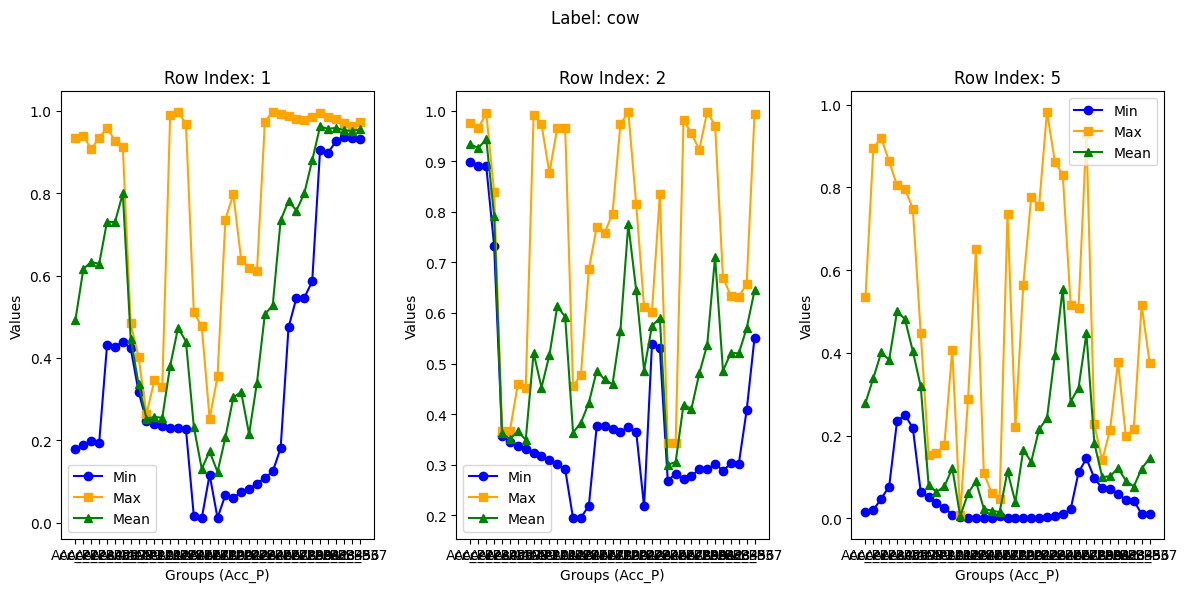

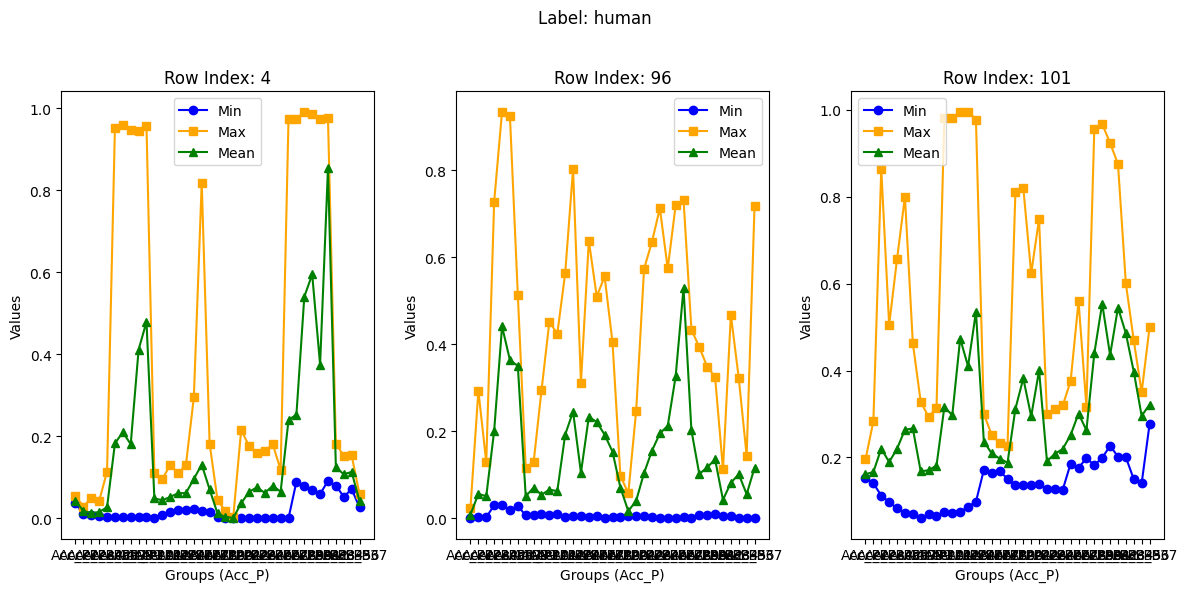

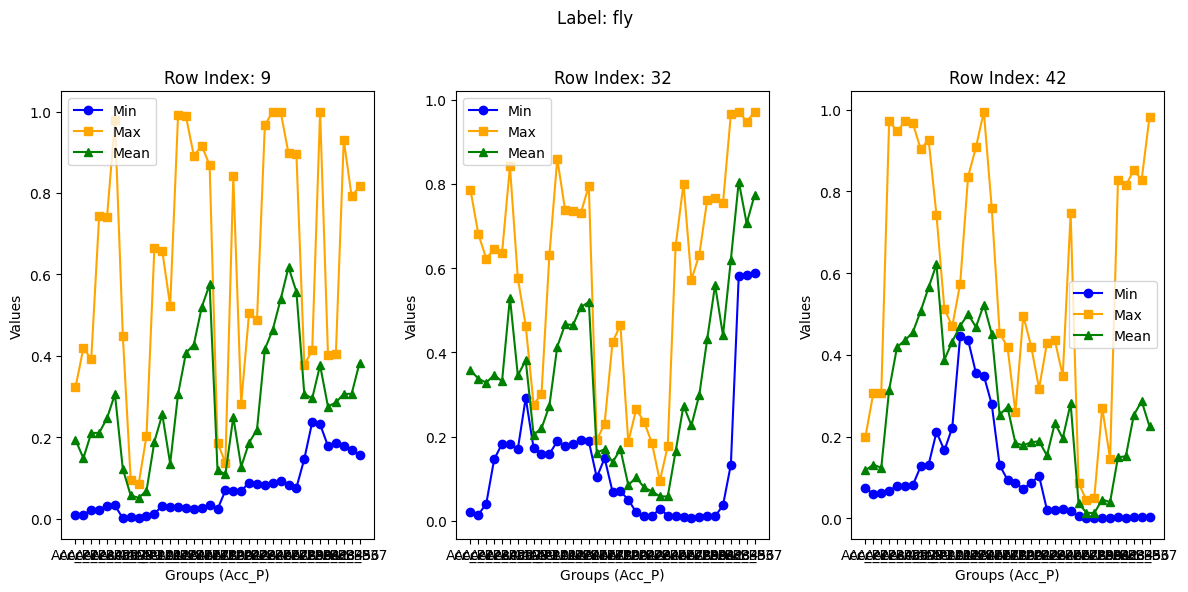

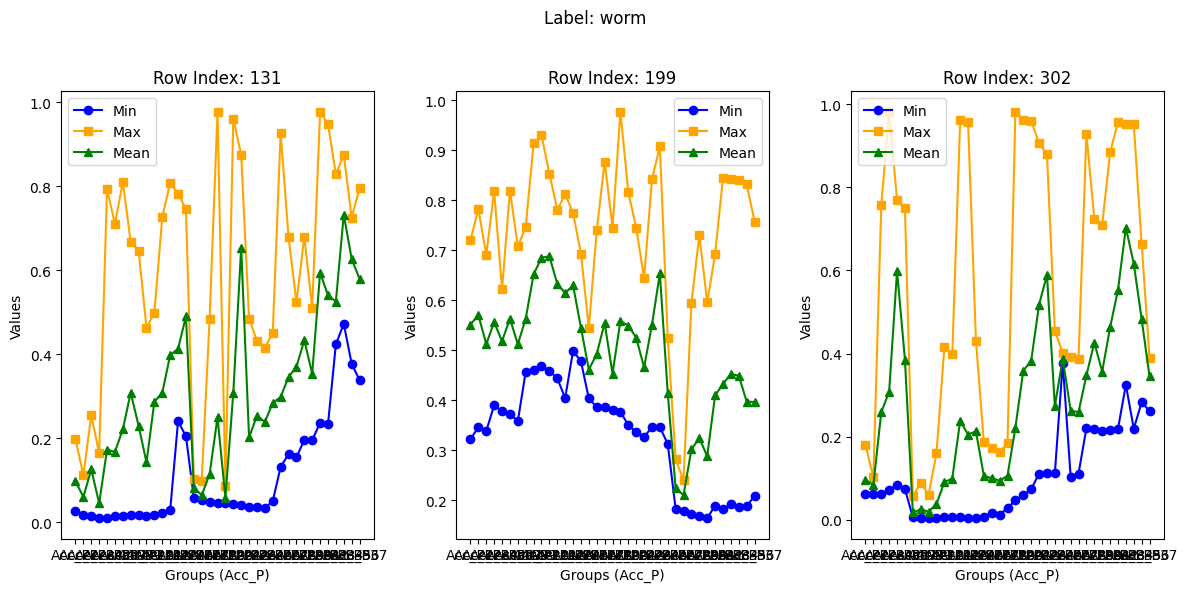

In [ ]:
# Step 1: Filter unique labels and exclude NaN
unique_labels = data['label'].dropna().unique()  # Drop NaN values
print("Filtered Unique Labels:", unique_labels)

# Step 2: Plot for each label
for label in unique_labels:
    # Filter rows corresponding to the current label
    rows_for_label = data[data['label'] == label]

    # Check if there are at least 6 rows for the label
    if len(rows_for_label) < 6:
        print(f"Warning: Less than 6 rows for label {label}. Skipping.")
        continue

    # Select the first 6 rows for the label
    selected_rows = rows_for_label.head(3)

    # Create a grid of 2x3 (6 graphs)
    fig, axes = plt.subplots(1, 3, figsize=(12, 6))
    fig.suptitle(f"Label: {true_labels[label]}", fontsize=12)

    # Plot each row in a separate subplot
    for i, (index, row) in enumerate(selected_rows.iterrows()):
        # Generate data for the specific index
        row_data = makedatafor_index(index)

        # Determine subplot location
        ax = axes[i]  # Map row index to 2x3 grid

        # Plot the data on the current subplot
        ax.plot(row_data.index, row_data['min'], label='Min', color='blue', marker='o')
        ax.plot(row_data.index, row_data['max'], label='Max', color='orange', marker='s')
        ax.plot(row_data.index, row_data['mean'], label='Mean', color='green', marker='^')

        ax.set_title(f"Row Index: {index}")
        ax.set_xlabel('Groups (Acc_P)')
        ax.set_ylabel('Values')
        ax.legend()

    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the main title
    plt.show()


#### Summary


In conclusion, we saw that our information contains a lot of 593 columns, on 9053 rows,
Of these there are about 30% cells that are empty.

Beyond that, we saw that there are 370 lines that deal with measuring the results of probably 10 samples of 37 different times. It is not known what the days/times are, but we clearly see a pattern that is 10 samples for 37 times.

In the division into labels you can see that people and worms have the fewest cows and the most.

There are about 99 categorical columns.

### Preprocessing (10 pts):
Describe in detail what did you do in the preprocessing phase and why you did it.

***Write your code below***

In [ ]:
# Implement here

In [ ]:
# Explain here

### Model training (10 pts):
Train your Decision Tree model.
Explain in detail what model you used to achieve your highest score, what the hyper-parameters were, and why did you choose both the model and these parameters.
Attach at least two learning plot and explain them.

***Write your code below***

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


In [ ]:
# Implement here
data_ex1 = data
data_ex2 = data


In [ ]:
data_test.isna().sum()

,0
Acc_P10_10th,6901
Acc_P10_1th,7216
Acc_P10_2th,6982
Acc_P10_3th,7006
Acc_P10_4th,6855
...,...
miRNAPairingCount_X3p_bulge_nt,6974
miRNAPairingCount_X3p_bulge_target_nt,7026
miRNAPairingCount_X3p_mir_bulge,6926
miRNAPairingCount_X3p_mismatch,7000


In [ ]:
data_test = pd.read_csv('x_test.csv')
id = data_test['id']
data_test = data_test.drop(['id'],axis=1)
data_test.shape


(23205, 592)

In [ ]:
data_dropna(data_test)
encode_columns_inplace(data_test,list_object_columns)
Handle_Acc_columns(data_test)
fill_na_global(data_test)

data_test.shape

<ipython-input-333-c36797dc1669>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{group}_max'] = df[columns].max(axis=1)
<ipython-input-333-c36797dc1669>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{group}_min'] = df[columns].min(axis=1)
<ipython-input-333-c36797dc1669>:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented f

(23205, 333)

In [ ]:
# PipeLine
def data_dropna(df):
  # df = df.dropna(subset=['label'])
  threshold = df.shape[0] // 18
  df = df.dropna(axis='rows', thresh = threshold )
  df.shape

def encode_columns_inplace(df, columns):
    """
    Encodes the specified columns of the DataFrame in place using LabelEncoder.
    """
    for col in columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))  # Convert to string to handle NaNs

def Handle_Acc_columns(df):
  for group, columns in Acccolumns.items():
      # Calculate max, min, and mean for the group
      df[f'{group}_max'] = df[columns].max(axis=1)
      df[f'{group}_min'] = df[columns].min(axis=1)
      df[f'{group}_mean'] = df[columns].mean(axis=1)
      # Drop the original columns for the group
      df.drop(columns=columns, inplace=True)


def fill_na(df):
  def fill_na_by_group(df, group_col, numeric_cols, categorical_cols):
      def fill_group(group):
          # Fill numeric columns with mean
          group[numeric_cols] = group[numeric_cols].fillna(group[numeric_cols].mean())
          # Fill categorical columns with mode
          for col in categorical_cols:
              group[col] = group[col].fillna(group[col].mode()[0])
          return group

      # Apply the fill logic for each group
      return df.groupby(group_col).apply(fill_group)

  # Specify numeric and categorical columns
  numeric_cols = df.select_dtypes(include=['number']).columns
  categorical_cols = df.select_dtypes(include=['object']).columns

  # Fill NaN values based on label groups
  df = fill_na_by_group(df, 'label', numeric_cols, categorical_cols)

def fill_na_global(df):
    """
    Fills NaN values for numeric columns with the mean
    and for categorical columns with the mode.
    """
    # Identify numeric and categorical columns
    numeric_cols = df.select_dtypes(include=['number']).columns
    categorical_cols = df.select_dtypes(include=['object']).columns

    # Fill numeric columns with mean
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

    # Fill categorical columns with mode
    for col in categorical_cols:
        df[col] = df[col].fillna(df[col].mode()[0])

    return df



In [ ]:
# threshold = data_ex1.shape[1] // 2
# data_ex1 = data_ex1.dropna(thresh=1)
data_ex1 = data_ex1.dropna(subset=['label'])
threshold = data_ex1.shape[0] // 18
print(f"Keep only rows that have more than {threshold} non Na values")
data_ex1 = data_ex1.dropna(axis='rows', thresh = threshold )
data_ex1.shape

Keep only rows that have more than 353 non Na values


(6363, 593)

In [ ]:
# Create and replace columns for each group in Acccolumns

for group, columns in Acccolumns.items():
    # Calculate max, min, and mean for the group
    data_ex1[f'{group}_max'] = data_ex1[columns].max(axis=1)
    data_ex1[f'{group}_min'] = data_ex1[columns].min(axis=1)
    data_ex1[f'{group}_mean'] = data_ex1[columns].mean(axis=1)

    # Drop the original columns for the group
    data_ex1.drop(columns=columns, inplace=True)

# Verify the updated DataFram

<ipython-input-310-27f09a38fc5c>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_ex1[f'{group}_mean'] = data_ex1[columns].mean(axis=1)
<ipython-input-310-27f09a38fc5c>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_ex1[f'{group}_max'] = data_ex1[columns].max(axis=1)
<ipython-input-310-27f09a38fc5c>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. T

In [ ]:
data_ex1.shape

(6363, 334)

In [ ]:
print(f"total of groups : {len(grouped_columns)}")
for k,v in grouped_columns.items():
    print(f"name of start_column {k} : \n number of columns: {len(v)} first 5 columns: {v[:5]} ...")

total of groups : 9
name of start_column Acc : 
 number of columns: 370 first 5 columns: ['Acc_P10_10th', 'Acc_P10_1th', 'Acc_P10_2th', 'Acc_P10_3th', 'Acc_P10_4th'] ...
name of start_column Energy : 
 number of columns: 7 first 5 columns: ['Energy_MEF_3p', 'Energy_MEF_Duplex', 'Energy_MEF_Seed', 'Energy_MEF_cons_local_target', 'Energy_MEF_cons_local_target_normalized'] ...
name of start_column HotPairingMRNA : 
 number of columns: 45 first 5 columns: ['HotPairingMRNA_he_P1_L1', 'HotPairingMRNA_he_P1_L2', 'HotPairingMRNA_he_P1_L3', 'HotPairingMRNA_he_P1_L4', 'HotPairingMRNA_he_P1_L5'] ...
name of start_column HotPairingMirna : 
 number of columns: 45 first 5 columns: ['HotPairingMirna_he_P1_L1', 'HotPairingMirna_he_P1_L2', 'HotPairingMirna_he_P1_L3', 'HotPairingMirna_he_P1_L4', 'HotPairingMirna_he_P1_L5'] ...
name of start_column MRNA : 
 number of columns: 60 first 5 columns: ['MRNA_Dist_to_end', 'MRNA_Dist_to_start', 'MRNA_Down_AA_comp', 'MRNA_Down_AC_comp', 'MRNA_Down_AG_comp'] ...


In [ ]:
unique_labels = data_ex1['label'].unique()
print(unique_labels)


[4. 2. 1. 3. 5.]


In [ ]:
def fill_na_by_group(df, group_col, numeric_cols, categorical_cols):
    def fill_group(group):
        # Fill numeric columns with mean
        group[numeric_cols] = group[numeric_cols].fillna(group[numeric_cols].mean())
        # Fill categorical columns with mode
        for col in categorical_cols:
            group[col] = group[col].fillna(group[col].mode()[0])
        return group

    # Apply the fill logic for each group
    return df.groupby(group_col).apply(fill_group)

# Specify numeric and categorical columns
numeric_cols = data_ex1.select_dtypes(include=['number']).columns
categorical_cols = data_ex1.select_dtypes(include=['object']).columns

# Fill NaN values based on label groups
data_ex1 = fill_na_by_group(data_ex1, 'label', numeric_cols, categorical_cols)



<ipython-input-313-ac2feb4ebe64>:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  group[col] = group[col].fillna(group[col].mode()[0])
<ipython-input-313-ac2feb4ebe64>:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(group_col).apply(fill_group)


In [ ]:
encode_columns_inplace(data_ex1,categorical_cols)

In [ ]:
# Separate features and label
X = data_ex1.drop(columns=['label'])  # Drop 'label' for PCA
labels = data_ex1['label']  # Retain 'label'

# Apply PCA
pca = PCA(n_components=100)
X_pca = pca.fit_transform(X)

# Combine PCA result with the label
X_pca_with_label = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(100)])
X_pca_with_label['label'] = labels.reset_index(drop=True)

# Print shapes
print("Original shape:   ", X.shape)
print("Transformed shape:", X_pca_with_label.shape)


Original shape:    (6363, 333)
Transformed shape: (6363, 101)


In [ ]:
# Separate features and labels
X = data_ex1.drop(columns=['label'])
y = data_ex1['label']

# Initialize the decision tree classifier
dt = DecisionTreeClassifier()

# Perform 5-fold cross-validation
cv_scores = cross_val_score(dt, X, y, cv=5, scoring='accuracy')

# Print the results
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())


Cross-validation scores: [0.93794187 0.92380204 0.93322859 0.92138365 0.93003145]
Mean accuracy: 0.9292775200462435


In [ ]:
# Fit the decision tree on the full dataset
dt.fit(X, y)

# Get feature importances
feature_importances = dt.feature_importances_

# Create a DataFrame for better visualization
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the most important features
print(importances_df.head(10))  # Show top 10 important features


                     Feature  Importance
60  HotPairingMirna_he_P2_L4    0.260898
72  HotPairingMirna_he_P5_L1    0.177480
54  HotPairingMirna_he_P1_L3    0.097530
2            Energy_MEF_Seed    0.056032
87  HotPairingMirna_he_P8_L1    0.052191
84  HotPairingMirna_he_P7_L3    0.037235
62  HotPairingMirna_he_P3_L1    0.037159
92  HotPairingMirna_he_P9_L1    0.025072
79  HotPairingMirna_he_P6_L3    0.023507
65  HotPairingMirna_he_P3_L4    0.022820
